# Implementing Logistic Regression 

In [71]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [38]:
rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')

<>:1: SyntaxWarning:

invalid escape sequence '\D'

<>:1: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\Sian\AppData\Local\Temp\ipykernel_6348\171121386.py:1: SyntaxWarning:

invalid escape sequence '\D'



| Feature         | Description                                                                                                  |
|-----------------|--------------------------------------------------------------------------------------------------------------|
| Date            | The date of observation                                                                                       |
| Location        | The common name of the location of the weather station                                                        |
| MinTemp         | The minimum temperature in degrees Celsius                                                                    |
| MaxTemp         | The maximum temperature in degrees Celsius                                                                    |
| Rainfall        | The amount of rainfall recorded for the day in mm                                                             |
| Evaporation     | The Class A pan evaporation (mm) in the 24 hours to 9am                                                       |
| Sunshine        | The number of hours of bright sunshine in the day                                                             |
| WindGustDir     | The direction of the strongest wind gust in the 24 hours to midnight                                          |
| WindGustSpeed   | The speed (km/h) of the strongest wind gust in the 24 hours to midnight                                       |
| WindDir9am      | Direction of the wind at 9am                                                                                  |
| WindDir3pm      | Direction of the wind at 3pm                                                                                  |
| WindSpeed9am    | Wind speed (km/h) averaged over 10 minutes prior to 9am                                                       |
| WindSpeed3pm    | Wind speed (km/h) averaged over 10 minutes prior to 3pm                                                       |
| Humidity9am     | Humidity (percent) at 9am                                                                                     |
| Humidity3pm     | Humidity (percent) at 3pm                                                                                     |
| Pressure9am     | Atmospheric pressure (hPa) reduced to mean sea level at 9am                                                   |
| Pressure3pm     | Atmospheric pressure (hPa) reduced to mean sea level at 3pm                                                   |
| Cloud9am        | Fraction of sky obscured by cloud at 9am, measured in "oktas" (eighths of the sky obscured by cloud)          |
| Cloud3pm        | Fraction of sky obscured by cloud at 3pm, measured in "oktas" (eighths of the sky obscured by cloud)          |
| Temp9am         | Temperature (degrees Celsius) at 9am                                                                         |
| Temp3pm         | Temperature (degrees Celsius) at 3pm                                                                         |
| RainToday       | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0                             |
| RainTomorrow    | The amount of next day rain in mm. Used to create the response variable RainTomorrow ("risk" measure)         |


In [39]:
rain_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [40]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Analying the unique values

In [41]:
for i in rain_df.drop(columns=['Date']).columns :
    if(rain_df[i].dtype==object):
        print(f"Unique Values in {i} is :{rain_df[i].unique()}")

Unique Values in Location is :['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Unique Values in WindGustDir is :['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Unique Values in WindDir9am is :['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Unique Values in WindDir3pm is :['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Unique Values in Ra

In [42]:
null_count=[]
for i in rain_df.columns:
    null_count.append(rain_df[i].isnull().sum())
    print(f"Null Values in {i} are : {rain_df[i].isnull().sum()}")
null_list=pd.Series(null_count,index=[x for x in rain_df.columns])

Null Values in Date are : 0
Null Values in Location are : 0
Null Values in MinTemp are : 1485
Null Values in MaxTemp are : 1261
Null Values in Rainfall are : 3261
Null Values in Evaporation are : 62790
Null Values in Sunshine are : 69835
Null Values in WindGustDir are : 10326
Null Values in WindGustSpeed are : 10263
Null Values in WindDir9am are : 10566
Null Values in WindDir3pm are : 4228
Null Values in WindSpeed9am are : 1767
Null Values in WindSpeed3pm are : 3062
Null Values in Humidity9am are : 2654
Null Values in Humidity3pm are : 4507
Null Values in Pressure9am are : 15065
Null Values in Pressure3pm are : 15028
Null Values in Cloud9am are : 55888
Null Values in Cloud3pm are : 59358
Null Values in Temp9am are : 1767
Null Values in Temp3pm are : 3609
Null Values in RainToday are : 3261
Null Values in RainTomorrow are : 3267


Comparing the Null Values Counts

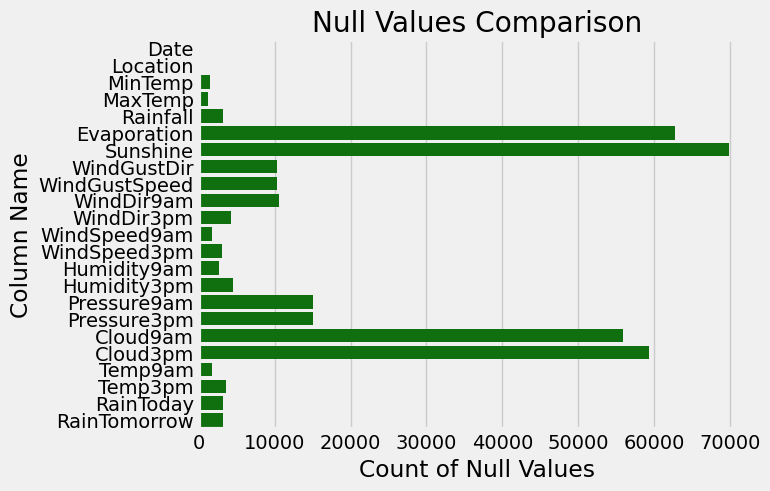

In [43]:
plt.title("Null Values Comparison")
plt.xlabel("Count of Null Values")
plt.ylabel("Column Name")
sns.barplot(x=null_list,y=null_list.index,color='green');

1. Here it is important to note that the Target Columns have some Null values so it can't be used to train our final model. Dropping  Sample values for which the  target columnn is empty
2. Alo it becomes really important to understant that thenull values in the data set for other features may not be purely due to missing accounts it may happen that for a Given Region the given set of info was not measured only 
3. Region is the main influencing factor in this dataset and based on region different parameters affecting the rainfall can be analysed

In [44]:
rain_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

Here we have dropped all the null samples from RainToday as well as RainTomorrow as Raintoday plays a major part in determining whether it would rain tommorrow

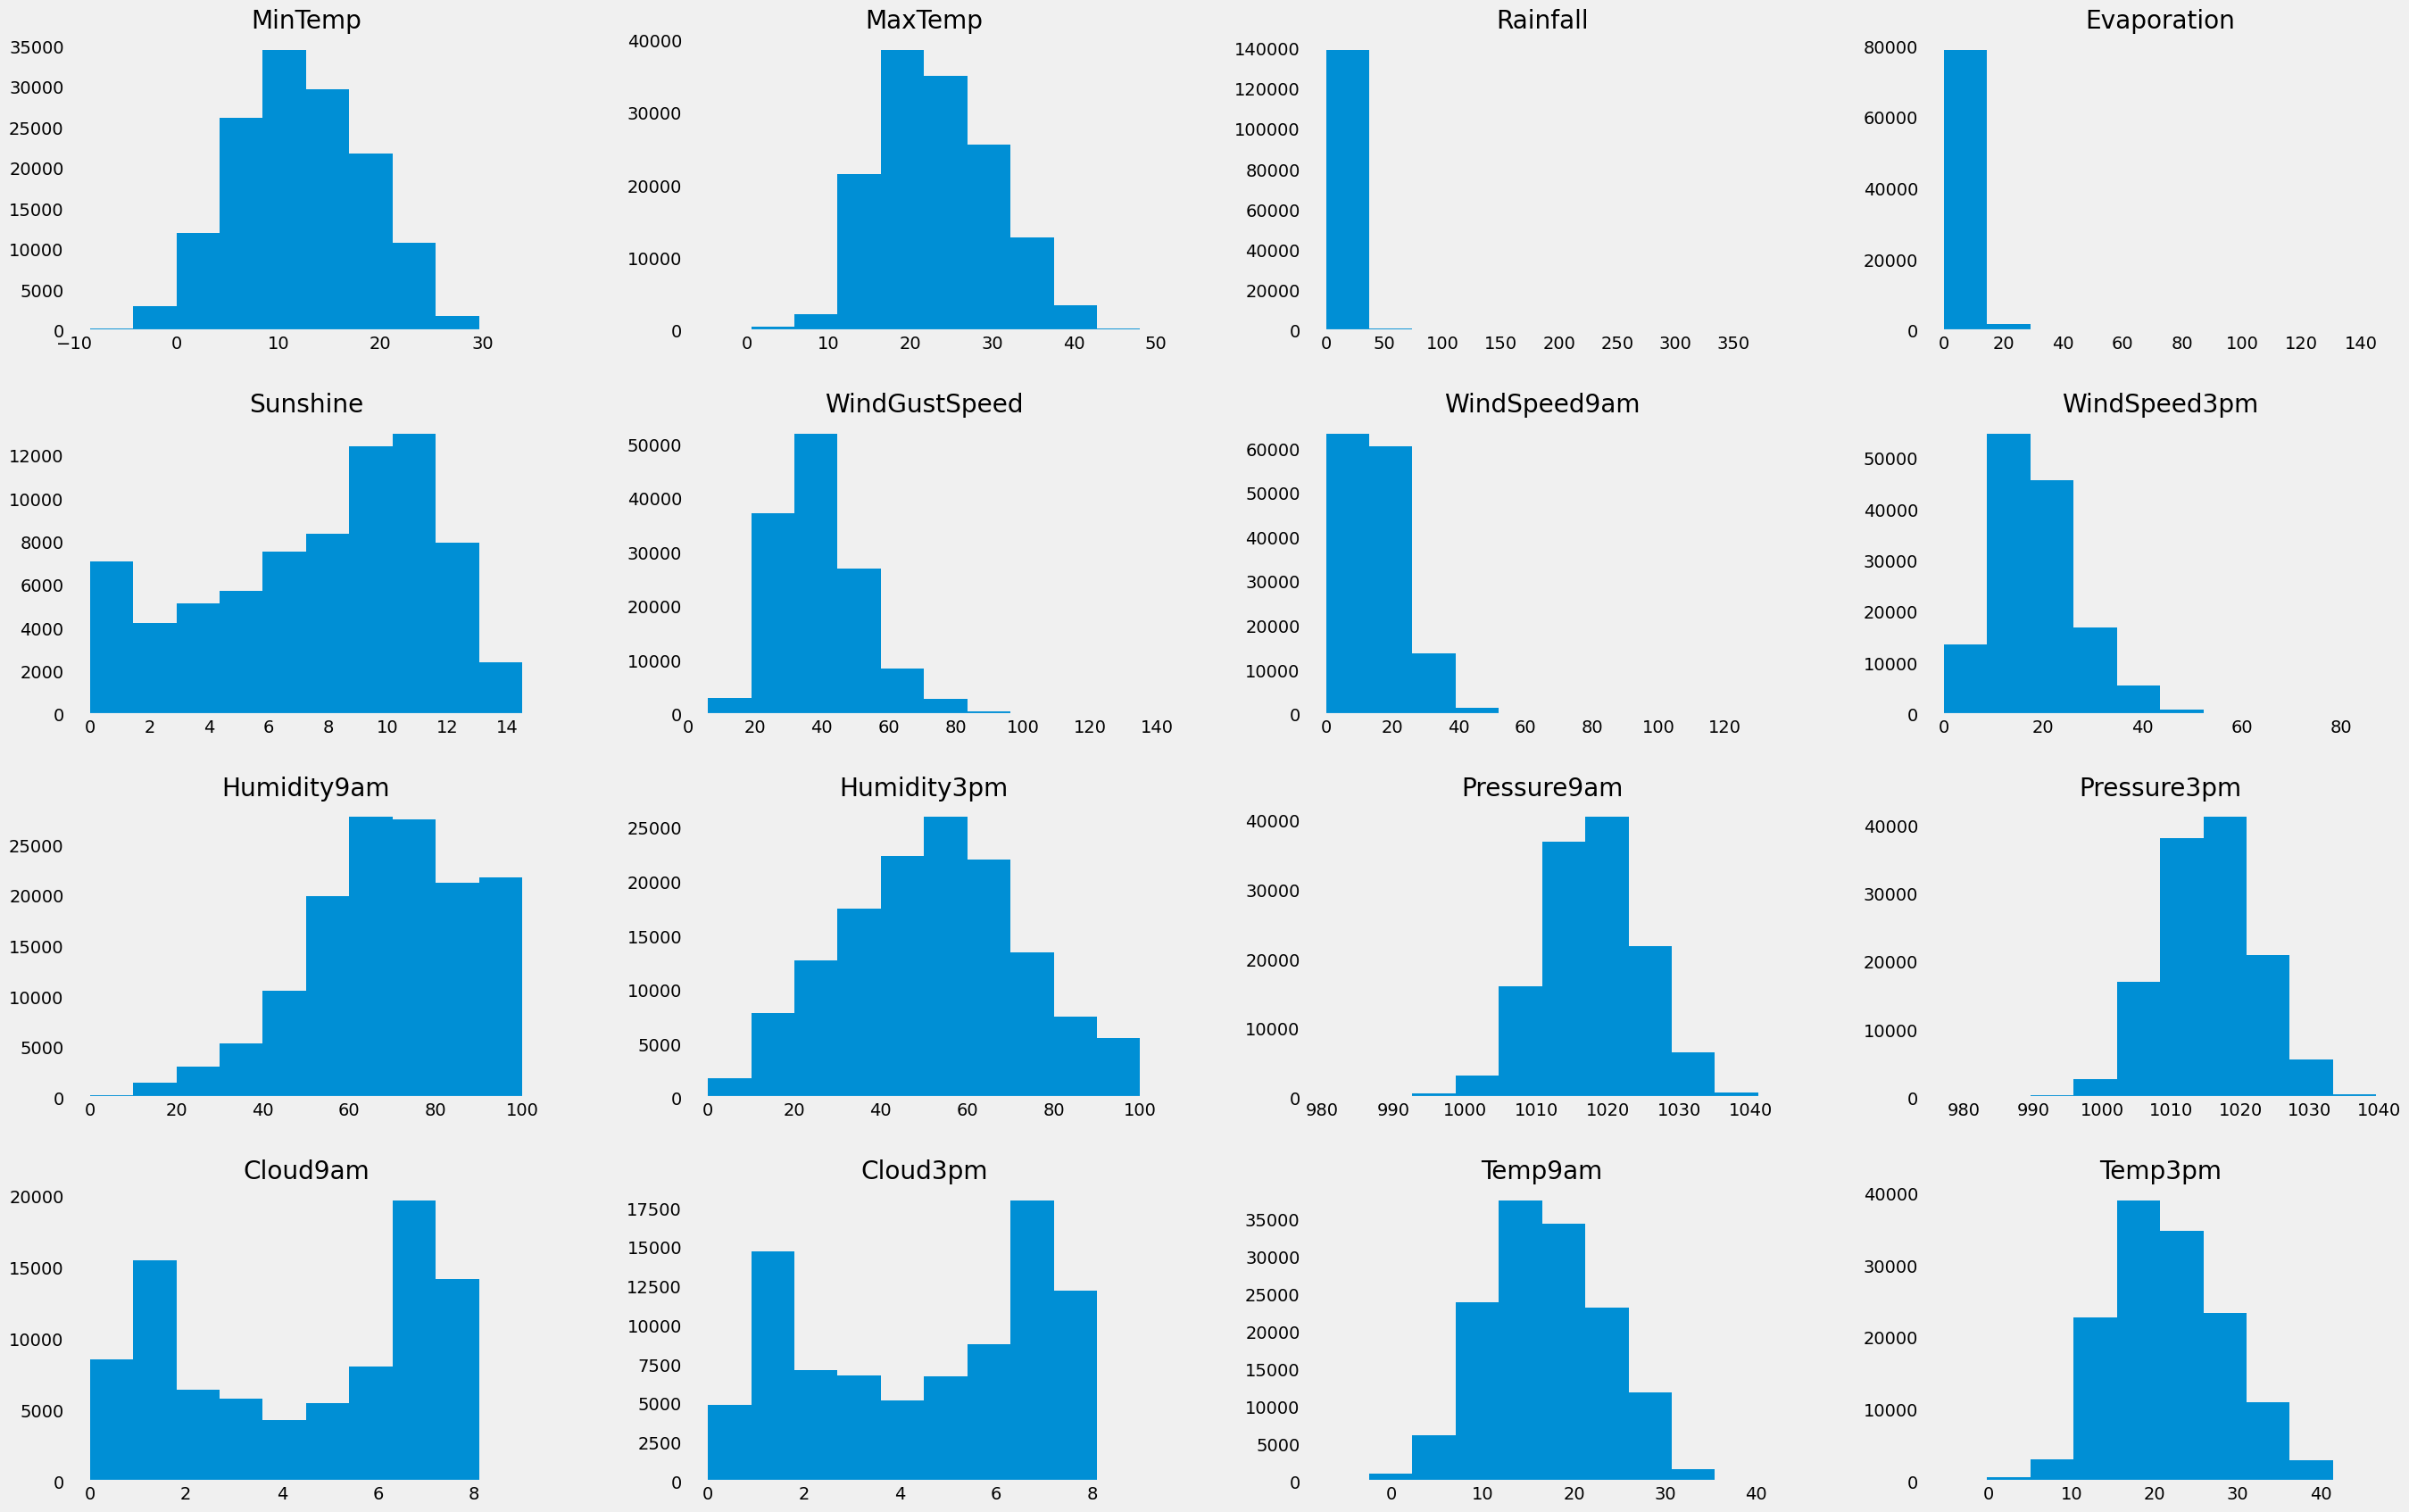

In [45]:
# plt.title("Distribution of Features in the Data")
rain_df.hist(grid=False,figsize=(30,20));

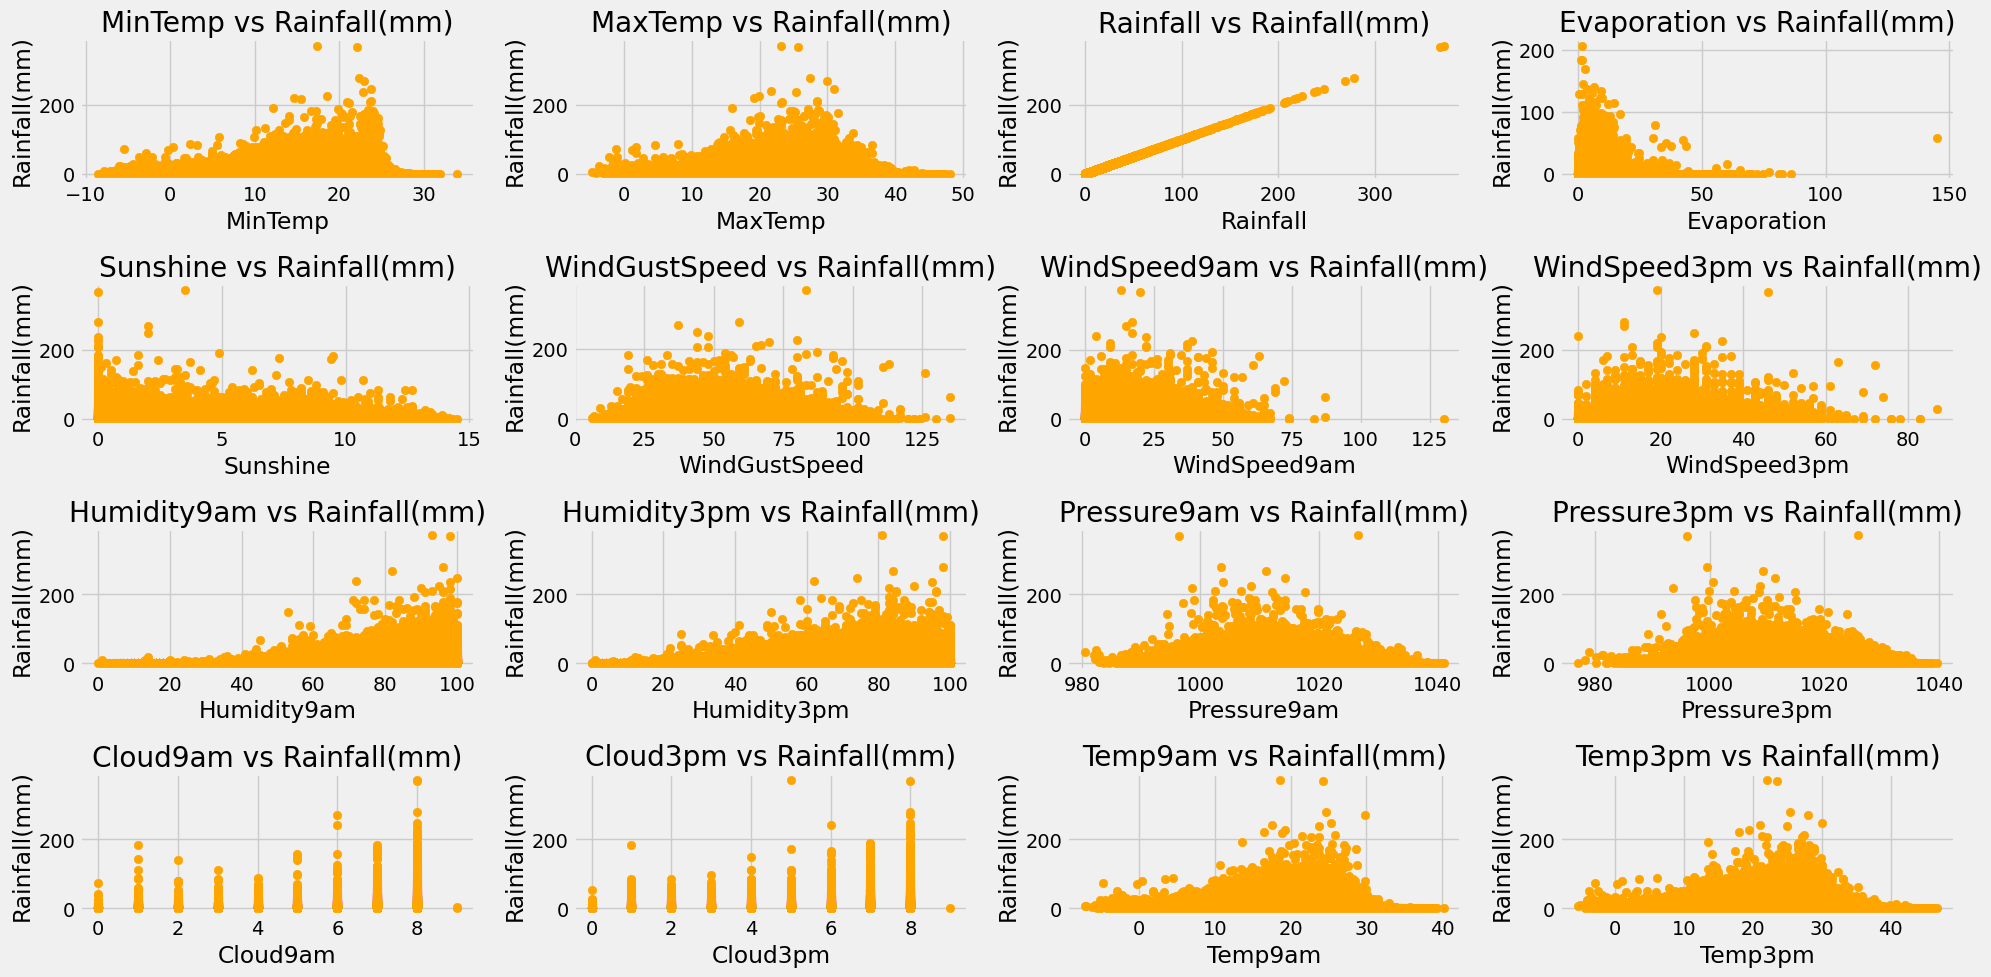

In [46]:
features = [x for x in rain_df.columns if(rain_df[x].dtype!=object)]
fig, axs = plt.subplots(4, 4, figsize=(20, 10)) 
# Important Step
axs = axs.flatten()
for i, feature in enumerate(features):
    axs[i].scatter(rain_df[feature], rain_df['Rainfall'], color='orange', marker='o')
    axs[i].set_title(f'{feature} vs Rainfall(mm)')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Rainfall(mm)')
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

##### Above it also becomes important to consider the Location where measurements are made as they can affect the average temp and other factors being recorded around that given area

In [47]:
fig=px.histogram(rain_df,x=rain_df['Location'],color='RainToday',title="Location-Wise Record Distribution")
fig.show()

##### Comparing how the Rain-tommorrow affects the Rain today Graph

In [48]:
fig=px.histogram(rain_df,x='RainTomorrow',color='RainToday')
fig.show()

It can be concluded that there are more number of samples where if raintoday=No then rainTomorrow is most probably=No

#### Sampling the Dataset to be Analysed 
**Whenever we have a datset which is very big in order to analyse the whole dataset we can just use the sample of the dataset and then analyse the dataset based on this extracted sample**

In [49]:
# Sampling Code : 
# use_sample=True/False
# sample_fraction=0.1,etc

# if use_sample:
    # raw_df=raw_df.sample(frac=sample_fraction).copy

#### Building and Model and testing it on different Datasets 
1. `train_set`: Model which will be build will learn from this dataset and try to recognise the pattern using different algorithms and solver 
2. `validation set`: Remember we don't want our model to learn the answers instead we want to build a model which can generalise well and don't overfit . Validation set can be used suring model training to check the scores of the model which has been built using `train_set`
3. `test_set` : Finally after training phaase is completed we will finally test the model on the test_set

In general a 60-20-20 Ratio is Good Indicator for train-val-test train


#### Importance of the time-serires Data 
Time Series data like : Stock-Market, Weather , Football Matches,etc are things which learn from past and try to compute the possible future outcome so 
1. Train-Val-Test set should be built based on timeline rather than radomly splitting the data using the train_test_split
2. Here Depending upon the Data Distribution Lets Try and split the data

In [50]:
# Converting the data to Time-Series Format in the Pandas 
year=pd.to_datetime(rain_df.Date).dt.year    

In [51]:
rain_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

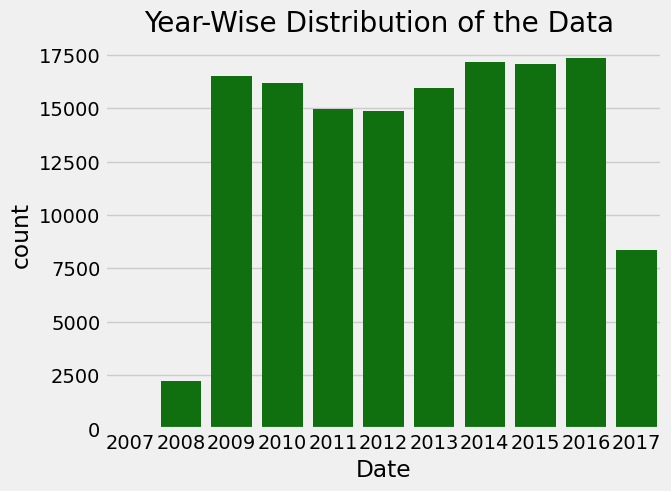

In [52]:
plt.style.use('fivethirtyeight')
plt.title("Year-Wise Distribution of the Data ")
sns.countplot(rain_df,x=pd.to_datetime(rain_df.Date).dt.year,color='green');

In [53]:
train_data=rain_df[year<2015].copy()
val_data =rain_df[year==2015].copy()
test_data=rain_df[year>2015].copy()

In [54]:
train_data.drop(columns=['Date'],inplace=True)
test_data.drop(columns=['Date'],inplace=True)
val_data.drop(columns=['Date'],inplace=True)

In [55]:
print(train_data.shape)
print(test_data.shape)
print(test_data.shape)

(97988, 22)
(25710, 22)
(25710, 22)


Notice that although the Data is not uniformly Dsitrbuted we have given Validation set a Period of One year so that it can possibly Cover all the seasons

#### Identitfying the Input And Target Columns as well as using the Categorical and Numerical Columns
categorical and numeric column can be generally selected by using the `select_dtypes()` function in the pandas 

In [56]:
input_cols=rain_df.drop(columns=['RainTomorrow','Date']).columns.tolist()
target_col='RainTomorrow'

In [57]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [58]:
target_col

'RainTomorrow'

In [59]:
train_inputs=train_data[input_cols].copy()
train_tar=train_data[target_col].copy()
test_input=test_data[input_cols].copy()
test_tar=test_data[target_col].copy()
val_input=val_data[input_cols].copy()
val_target=val_data[target_col].copy()

In [60]:
numeric_cols=train_data.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_data.select_dtypes(object).columns.tolist()

In [61]:
print(numeric_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [62]:
train_data[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

#### Filling in the Missing Values (Imputation)
1. Filling the Values with Mean --> mean can be used to fill the null values when there are no significant amount of outliers present in the data 
2. Median --> In case of Data with Significant amount of outliers if we use the mean it would be distorted hence it is better to use median (Filling Null Values in Case of Salaries)
3. We have to essentially handle the Null values before using the data fo Machine learning as the Algorithm may crash

In [63]:
imputer=SimpleImputer(strategy='mean')
train_inputs[numeric_cols]=imputer.fit_transform(train_inputs[numeric_cols])
val_input[numeric_cols]=imputer.fit_transform(val_input[numeric_cols])
test_input[numeric_cols]=imputer.fit_transform(test_input[numeric_cols])

After Fitting and Transformation they are converted to Numpy Arrays 

In [64]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6     5.289991  7.609004   
1        Albury      7.4     25.1       0.0     5.289991  7.609004   
2        Albury     12.9     25.7       0.0     5.289991  7.609004   
3        Albury      9.2     28.0       0.0     5.289991  7.609004   
4        Albury     17.5     32.3       1.0     5.289991  7.609004   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0     5.289991  7.609004   
144549    Uluru     15.1     36.8       0.0     5.289991  7.609004   
144550    Uluru     17.3     37.8       0.0     5.289991  7.609004   
144551    Uluru     20.1     38.5       0.0     5.289991  7.609004   
144552    Uluru     22.5     39.6       0.0     5.289991  7.609004   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1  8.000000   
1              44.0         25.0       1010.6       1007.8  4.302952   
2              38.0         30.0       1007.6       1008.7  4.302952   
3              45.0         16.0       1017.6       1012.8  4.302952   
4              82.0         33.0       1010.8       1006.0  7.000000   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8  4.302952   
144549         16.0          8.0       1012.6       1007.6  4.302952   
144550         15.0          8.0       1011.9       1008.0  4.302952   
144551         22.0          9.0       1014.0       1009.2  4.302952   
144552         16.0          9.0       1012.1       1006.2  4.302952   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0       4.410677     16.9     21.8         No  
1       4.410677     17.2     24.3         No  
2       2.000000     21.0     23.2         No  
3       4.410677     18.1     26.5         No  
4       8.000000     17.8     29.7         No  
...          ...      ...      ...        ...  
144548  4.410677     23.7     31.8         No  
144549  4.410677     28.9     34.8         No  
144550  4.410677     29.7     35.7         No  
144551  4.410677     29.8     37.2         No  
144552  4.410677     30.1     37.4         No  

[97988 rows x 21 columns]

Scaling the Features so that the model does not overweight a feature over other  \
Here we will be scaling features on same range for all

In [68]:
scaler=MinMaxScaler()
train_inputs[numeric_cols] =scaler.fit_transform(train_inputs[numeric_cols])
test_input[numeric_cols] = scaler.fit_transform(test_input[numeric_cols])
val_input[numeric_cols]  = scaler.fit_transform(val_input[numeric_cols])


In [70]:
train_inputs.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483675      0.519582      0.006396      0.064199      0.532098   
std        0.149457      0.133673      0.022962      0.038045      0.203740   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.377358      0.421456      0.000000      0.046117      0.524476   
50%        0.478774      0.507663      0.000000      0.064199      0.532098   
75%        0.591981      0.613027      0.002156      0.067961      0.643357   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265239      0.161980      0.215685      0.686287      0.514695   
std         0.102419      0.102805      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.080460      0.149425      0.570000      0.370000   
50%         0.255814      0.149425      0.218391      0.690000      0.520000   
75%         0.310078      0.218391      0.275862      0.830000      0.650000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.611797      0.596243      0.478106      0.490075      0.493170   
std        0.111333      0.109952      0.255395      0.237981      0.138521   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.543802      0.526403      0.333333      0.333333      0.392625   
50%        0.611797      0.596243      0.478106      0.490075      0.488069   
75%        0.682645      0.665017      0.666667      0.666667      0.590022   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.520315  
std        0.133024  
min        0.000000  
25%        0.423828  
50%        0.509766  
75%        0.609375  
max        1.000000

All the values have been scaled on the range of (0-1) so that the problem of overweighing a feature above something else does not occur

#### Encoding the Categorical Data for Machine Learning 

In machine learning, several types of encoding techniques are used to handle categorical data. The main types include:

1. **One-Hot Encoding**: 
   - Each category is represented as a binary vector. Each category gets its own column, and the value is set to 1 where the category is present and 0 for all others.
   - Useful for nominal data (categories with no ordinal relationship).
   
2. **Label Encoding**:
   - Each category is assigned a unique integer value. 
   - Useful for ordinal data (categories with an inherent order). 
   - Can sometimes introduce unintended relationships for nominal data.

3. **Ordinal Encoding**:
   - Similar to label encoding, but explicitly used for ordered categories where there’s a meaningful ranking (e.g., "low," "medium," "high").

4. **Binary Encoding**:
   - Each category is first converted to an integer, then transformed into binary format, and each bit gets its own column.
   - Reduces the dimensionality compared to one-hot encoding, which is helpful when there are many categories.

5. **Target Encoding (Mean Encoding)**:
   - Categories are replaced with the mean of the target variable for each category.
   - Useful in supervised learning, but it needs to be handled carefully to avoid data leakage.

6. **Frequency Encoding**:
   - Categories are replaced with the frequency of their occurrences in the dataset.
   - A simple and effective way to represent categorical data.

7. **Hash Encoding**:
   - Hashing trick is applied to encode categories into a fixed number of columns. The categories are transformed using a hash function.
   - Useful when there are many unique categories.

8. **Leave-One-Out Encoding**:
   - Similar to target encoding, but for each data point, the mean target is calculated excluding that point's own target value.
   - Helps reduce overfitting while preserving the predictive power of target encoding.



In [72]:
encoder = OneHotEncoder()
encoder.fit(train_inputs[categorical_cols])

KeyError: "['RainTomorrow'] not in index"